In [28]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

In [29]:
iris = load_iris()

In [30]:
file = pd.DataFrame(iris.data, columns=iris.feature_names)
file['target'] = iris.target
file['flower_name'] = file['target'].apply(lambda x : iris.target_names[x])

In [31]:
file.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [32]:
file.drop(['sepal length (cm)', 'sepal width (cm)'], axis=1, inplace=True)

In [33]:
file.head()

,petal length (cm),petal width (cm),target,flower_name
0,1.4,0.2,0,setosa
1,1.4,0.2,0,setosa
2,1.3,0.2,0,setosa
3,1.5,0.2,0,setosa
4,1.4,0.2,0,setosa


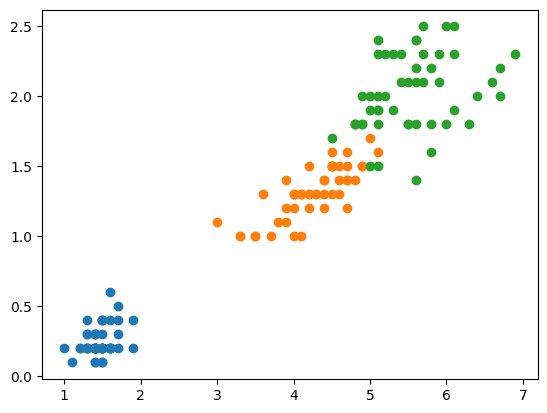

In [34]:
fig, ax = plt.subplots()
f1 = file[file['target'] == 0]
f2 = file[file['target'] == 1]
f3 = file[file['target'] == 2]
ax.scatter(f1['petal length (cm)'], f1['petal width (cm)'])
ax.scatter(f2['petal length (cm)'], f2['petal width (cm)'])
ax.scatter(f3['petal length (cm)'], f3['petal width (cm)'])

In [35]:
from sklearn.cluster import KMeans
mse = []
k_range = range(1, 11)

for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(file[['petal length (cm)', 'petal width (cm)']])
    mse.append(km.inertia_)
    
mse

[550.8953333333334,
 86.39021984551395,
 31.371358974358984,
 19.465989010989013,
 13.91690875790876,
 11.040239971910452,
 9.21530102264885,
 7.621496965452849,
 6.556609557109558,
 5.639288766788766]

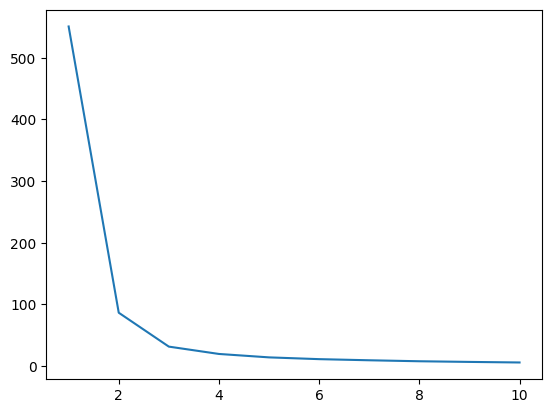

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()
ax.plot(k_range, mse)

# here it is clear that we can get the 3 as the number of clusters

In [39]:
km = KMeans(n_clusters=3)

y_predicted = km.fit_predict(file[['petal length (cm)', 'petal width (cm)']])

In [41]:
file['old_cluster'] = km.fit_predict(file[['petal length (cm)', 'petal width (cm)']])

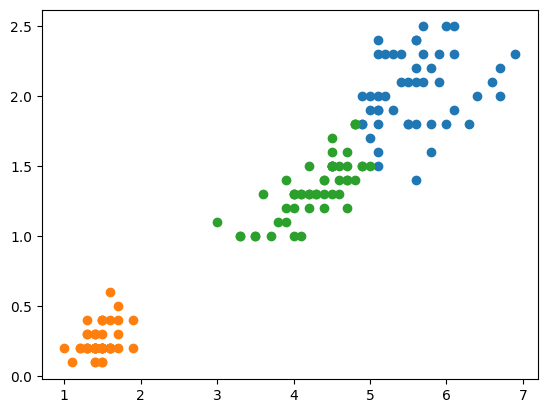

In [43]:
fig, ax = plt.subplots()

f1 = file[file['old_cluster'] == 0]
f2 = file[file['old_cluster'] == 1]
f3 = file[file['old_cluster'] == 2]

ax.scatter(f1['petal length (cm)'], f1['petal width (cm)'])
ax.scatter(f2['petal length (cm)'], f2['petal width (cm)'])
ax.scatter(f3['petal length (cm)'], f3['petal width (cm)'])

In [ ]:
# here we have got the optimal three clusters here
# Hoooraaay